In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [3]:
data_path = '/home/sean/mea data/02/02_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [23]:
def is_top(unit_name):
    row = mc.get_row_number(unit_name)
    if row <= 3:
        return 1
    else:
        return False
    
def is_bottom(unit_name):
    row = mc.get_row_number(unit_name)
    if row > 3:
        return True
    else:
        return False
    
def is_early(unit_name):
    col = mc.get_col_number(unit_name)
    if col <= 4:
        return True
    else:
        return False

def is_late(unit_name):
    col = mc.get_col_number(unit_name)
    if col > 4:
        return True
    else:
        return False

def is_all(unit_name):
    return True

#cond_filt = {
#    'All': is_top,
#    'Some': is_bottom, 
#    'Early': is_early,
#    'Late': is_late
#}

cond_filt = {
    'All': is_all
}

cat_table = plotting.construct_categorized_dataframe(data_table, cond_filt)
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel
fourhr_table_1 = cat_table.query('time > "2017-08-01 09:21:00" and time < "2017-08-01 13:21:00"')
fourhr_table_2 = cat_table.query('time > "2017-08-02 09:15:00" and time < "2017-08-02 13:15:00"')

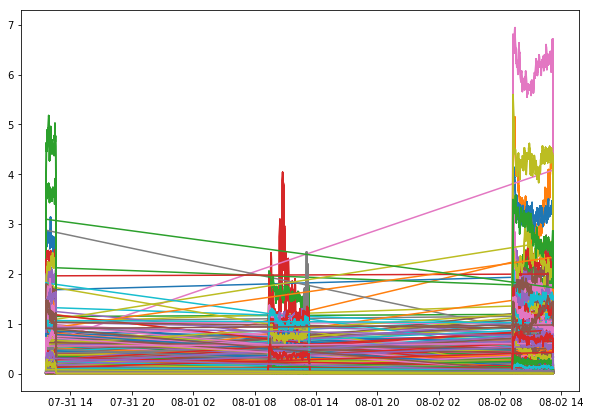

In [17]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)

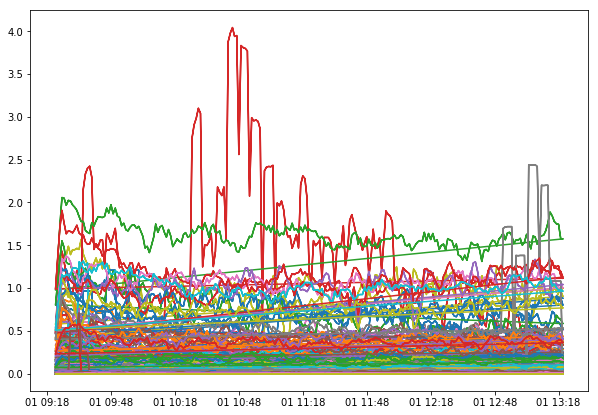

In [18]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(fourhr_table_1)

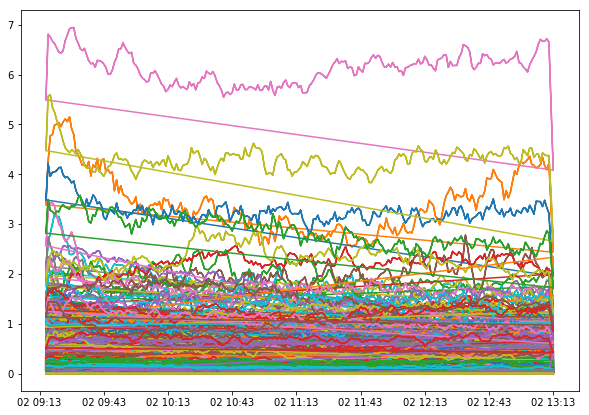

In [19]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(fourhr_table_2)

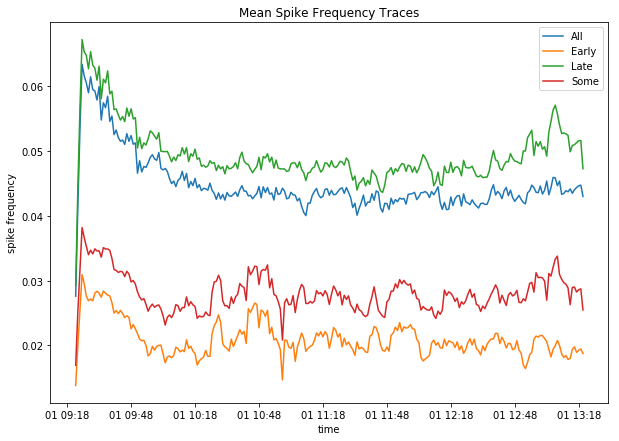

In [20]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(fourhr_table_1)

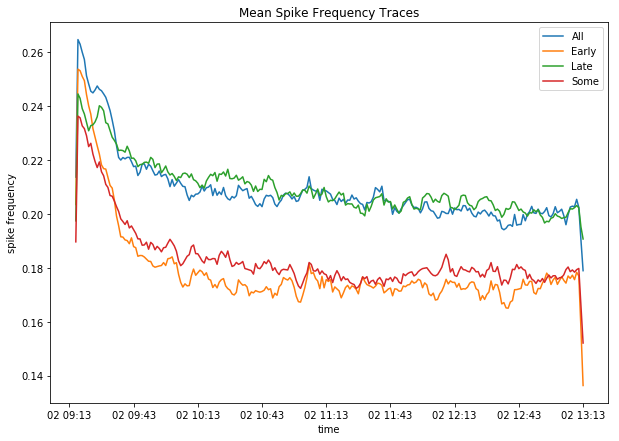

In [21]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(fourhr_table_2)

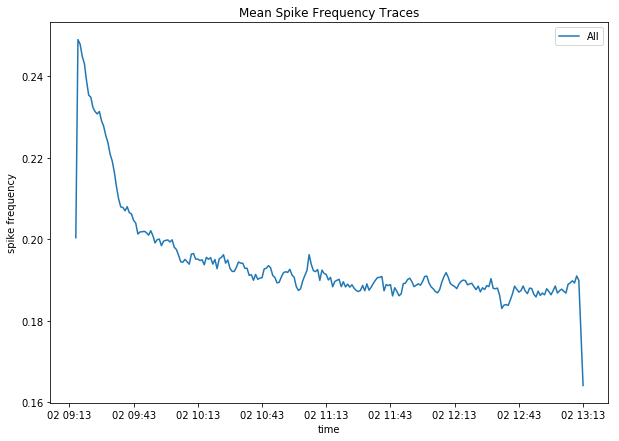

In [24]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(fourhr_table_2)